In [1]:
from google.colab import drive

# Try explicitly authorizing the connection
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import pathlib
import tensorflow as tf
import tensorflow.keras.layers as tfl
import PIL
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import RandomFlip, RandomRotation, Rescaling

In [3]:
data_dir = pathlib.Path('drive/MyDrive/carla1_dataset/')
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

2120


In [4]:
def plot_stats(*args):

  acc = []
  val_acc = []
  loss = []
  val_loss = []
  epochs = 0
  epoch_list = []

  for history in args:
    assert hasattr(history, 'history'), f"Object {history} is not a History object."

    acc += history.history['accuracy']
    #val_acc += history.history['val_accuracy']
    loss += history.history['loss']
    #val_loss += history.history['val_loss']
    epoch_list.append(epochs + len(history.history['accuracy']))
    epochs += len(history.history['accuracy'])

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(acc, label='Training accuracy')
  #plt.plot(val_acc, label='Validation accuracy')
  plt.ylim([min(plt.ylim()),1])
  for x in epoch_list[:-1]:
    plt.plot([x, x], plt.ylim())
  plt.legend(loc='upper left')
  plt.ylabel('Accuracy')
  plt.xlim([0, epochs])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2,1,2)
  plt.plot(loss, label='Training loss')
  #plt.plot(val_loss, label='Validation loss')
  plt.legend(loc='upper left')
  plt.ylabel('Cross Entropy')
  plt.ylim([0,1.])
  plt.xlim([0, epochs])
  for x in epoch_list[:-1]:
    plt.plot([x, x], plt.ylim())
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')

In [5]:
path = os.fspath('drive/MyDrive/carla1_dataset')
images_path = os.path.join(path, 'CameraRGB')
masks_path = os.path.join(path, 'CameraMask')
images_list = os.listdir(images_path)
masks_list = os.listdir(masks_path)
images_list.sort()
masks_list.sort()
image_list = [os.path.join(images_path, i) for i in images_list]
mask_list = [os.path.join(masks_path, i) for i in masks_list]

shape of the image: (480, 640, 4)
shape of the mask: (480, 640, 4)


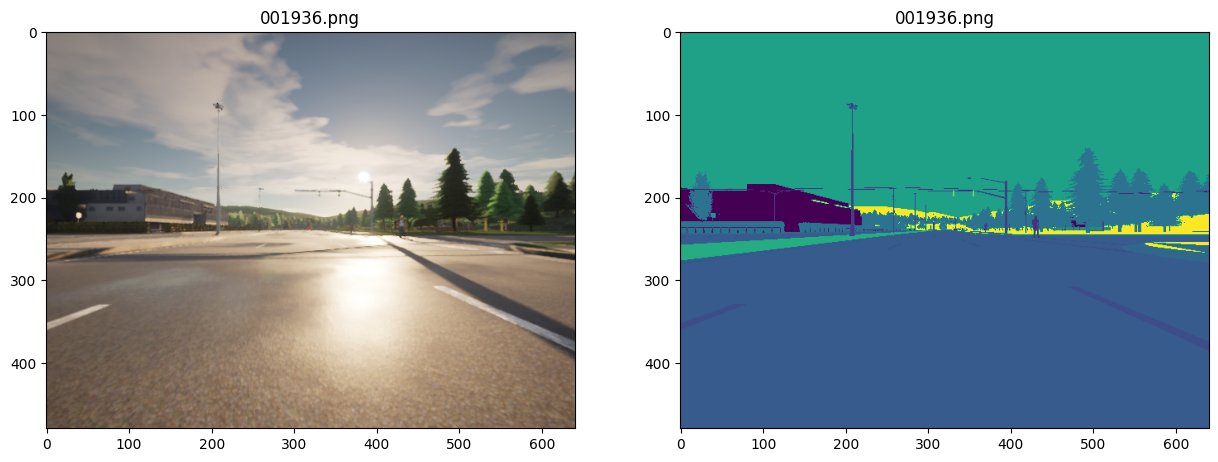

In [6]:
# plot a random image and mask from the dataset and its shape
r = np.random.randint(0, 100)
img = PIL.Image.open(image_list[r])
mask = mpimg.imread(mask_list[r])
print("shape of the image:", np.array(img).shape)
print("shape of the mask:", np.array(mask).shape)
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
# Display the first image
axes[0].imshow(img)
axes[0].set_title(str(images_list[r]))  # Optional title for the first image
axes[0].axis('on')  # Show axes

# Display the second image
axes[1].imshow(mask[:,:,0])
axes[1].set_title(str(masks_list[r]))  # Optional title for the second image
axes[1].axis('on')  # Show axes

# Show the plot
plt.show()


In [7]:
dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
for i,m in dataset.take(1):
  print(i)
  print(m)

tf.Tensor(b'drive/MyDrive/carla1_dataset/CameraRGB/000026.png', shape=(), dtype=string)
tf.Tensor(b'drive/MyDrive/carla1_dataset/CameraMask/000026.png', shape=(), dtype=string)


In [8]:
for i,m in dataset.take(1):
  a = tf.io.read_file(i)
  print(a)
  a = tf.io.decode_png(a, 4)
  print(a.shape)
  a = tf.image.convert_image_dtype(img, tf.float32, saturate=False)
  print(a.shape)
  a = tf.image.resize(a, (96, 128), method='nearest')
  print(a.shape)

tf.Tensor(b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x80\x00\x00\x01\xe0\x08\x06\x00\x00\x005\xd1\xdc\xe4\x00\x00 \x00IDAT\x18W\x8c\xefY\x12\xe5\xba\xb2C\t\x8a<1\xeb2\xab\x9f\x1c\xf7\x15\xcb\xd19];\xe2\xa5\x95v#\xd2\x1b`a\xfd\x7f\xfe\xbf\xff\xcfY\xcfz\xf0}\xce\xa97o|\xba\xfeT]\xad4\xd4\xe3S\x8d\xcc\xea\xf0\xd9\xed\x95,\x97\xc7\xaa3\xb6\xd2\xe3\x1a/\x84\xb8>=#\xbe\x9e\x9fg\x90\xb4\xa7\x91~k\x9f\xbe.\xd7\xfb+\xbc\'\xd4w\xb037\xaa\xed\xb2\x82LZA\xbe\xb7\xe7C\x95w\xe62{\xfb\xb7\xf3\x9d\xb9\xb9~\xb5\xfe\xb5;\xd3u\xbfs\xd5\xa1\xc4\x0f\xfe>\xfc\x1a@}\x8e&\x11{g\xf40\xe5\xc1\xccC\xb1wq^\x8b;\x9d\xf3\x1f\x83*\xe1\xdf<\xb5\xc3\x1b\xf7\xea\xec\x9dp\x8dI\xf7R)\xaf\xb0c\xa9\xd6\xb9\xeas,\xa4\xe7Y^~\xa9/Mg\x19s\xd8L\xca)\xddJ\x9e\xc5\xd4^\xfb/y0\xee\xb9\x08\x9cV4\xef\xa8\xc0o\t:\xb6\xde\xb8/t5\xa3\xb9\x8cgb\xa1\xbeH\xe4\x924\xcf\xc1\xbb\xb7\xb4}C\xf3\xd8\xfd:H\x97j\x1f\x16W4\xcb!x\xa1*\xdfx!\xf7\x19yb\xb5\x96\xb9\xcc\xa2my7u\x0f\xffW=T\xe3\x95\x94U\xb3\xf5\xda\xff\xa9\x9fV\xce\xb3\xe0\x9e2\r\

In [9]:
def process_path(image_path, mask_path):
  "Function that loades images and masks from filepath-tensors"
  img = tf.io.read_file(image_path)
  img = tf.io.decode_png(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32, saturate=False)

  mask = tf.io.read_file(mask_path)
  mask = tf.io.decode_png(mask, channels=3)
  mask = tf.math.reduce_max(mask, axis=-1, keepdims=True)

  return img, mask

def preprocess(image, mask):
  input_image = tf.image.resize(image, (96, 128), method='nearest')
  input_mask =  tf.image.resize(mask, (96, 128), method='nearest')
  return input_image, input_mask

image_ds = dataset.map(process_path)
processed_image_ds = image_ds.map(preprocess)

In [10]:
for i,m in processed_image_ds.take(1):
  print(i.shape)
  print(m.shape)

(96, 128, 3)
(96, 128, 1)


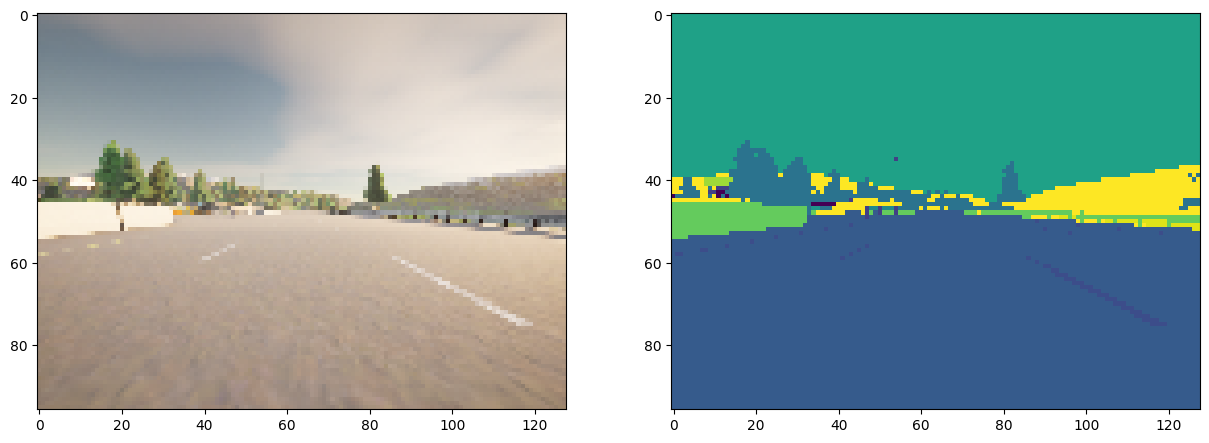

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
for i,m in processed_image_ds.take(1):
  # Display the first image
  axes[0].imshow(i)
  #axes[0].set_title(str(images_list[r]))  # Optional title for the first image
  axes[0].axis('on')  # Show axes

  # Display the second image
  axes[1].imshow(m)
  #axes[1].set_title(str(masks_list[r]))  # Optional title for the second image
  axes[1].axis('on')  # Show axes

# Show the plot
plt.show()

In [12]:
def conv_block(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):
    """
    Convolutional downsampling block

    Arguments:
        inputs -- Input tensor
        n_filters -- Number of filters for the convolutional layers
        dropout_prob -- Dropout probability
        max_pooling -- Use MaxPooling2D to reduce the spatial dimensions of the output volume
    Returns:
        next_layer, skip_connection --  Next layer and skip connection outputs
    """

    conv = tf.keras.layers.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv = tf.keras.layers.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv)

    # if dropout_prob > 0 add a dropout layer, with the variable dropout_prob as parameter
    if dropout_prob > 0:
        conv = tf.keras.layers.Dropout(dropout_prob)(conv)

    # if max_pooling is True add a MaxPooling2D with 2x2 pool_size
    if max_pooling:
        next_layer = tf.keras.layers.MaxPool2D()(conv)
    else:
        next_layer = conv

    skip_connection = conv

    return next_layer, skip_connection

In [13]:
def upsampling_block(expansive_input, contractive_input, n_filters=32):
    """
    Convolutional upsampling block

    Arguments:
        expansive_input -- Input tensor from previous layer
        contractive_input -- Input tensor from previous skip layer
        n_filters -- Number of filters for the convolutional layers
    Returns:
        conv -- Tensor output
    """

    up = tf.keras.layers.Conv2DTranspose(n_filters, 3, strides=(2,2), padding='same')(expansive_input)

    # Merge the previous output and the contractive_input
    merge = tf.keras.layers.Concatenate(axis=3)([up, contractive_input])
    conv = tf.keras.layers.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge)
    conv = tf.keras.layers.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv)

    return conv

In [14]:
def unet_model(input_size=(96, 128, 3), n_filters=32, n_classes=23):
    """
    Unet model

    Arguments:
        input_size -- Input shape
        n_filters -- Number of filters for the convolutional layers
        n_classes -- Number of output classes
    Returns:
        model -- tf.keras.Model
    """
    inputs = tf.keras.Input(input_size)
    cblock1 = conv_block(inputs, n_filters)
    cblock2 = conv_block(cblock1[0], 2*n_filters)
    cblock3 = conv_block(cblock2[0], 4*n_filters)
    cblock4 = conv_block(cblock3[0], 8*n_filters, dropout_prob=0.3)
    cblock5 = conv_block(cblock4[0], 16*n_filters, dropout_prob=0.3, max_pooling=None)

    ublock6 = upsampling_block(cblock5[0], cblock4[1],  8*n_filters)
    ublock7 = upsampling_block(ublock6, cblock3[1],  4*n_filters)
    ublock8 = upsampling_block(ublock7, cblock2[1],  2*n_filters)
    ublock9 = upsampling_block(ublock8, cblock1[1],  n_filters)

    conv9 = tf.keras.layers.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(ublock9)
    conv10 = tf.keras.layers.Conv2D(n_classes, 1, padding='same')(conv9)

    model = tf.keras.Model(inputs=inputs, outputs=conv10)

    return model

In [15]:
img_height = 96
img_width = 128
num_channels = 3

unet = unet_model((img_height, img_width, num_channels))

In [16]:
unet.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 96, 128, 3)     │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 96, 128, 32)    │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 96, 128, 32)    │          9,248 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 48, 64, 32)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 48, 64, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 48, 64, 64)     │         36,928 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 24, 32, 64)     │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 24, 32, 128)    │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 24, 32, 128)    │        147,584 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 12, 16, 128)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 12, 16, 256)    │        295,168 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 12, 16, 256)    │        590,080 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 12, 16, 256)    │              0 │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 6, 8, 256)      │              0 │ dropout[0][0]          │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 6, 8, 512)      │      1,180,160 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 6, 8, 512)      │      2,359,808 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 6, 8, 512)      │              0 │ conv2d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose     

 Total params: 8,640,471 (32.96 MB)

 Trainable params: 8,640,471 (32.96 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
unet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
EPOCHS = 40
VAL_SUBSPLITS = 5
BUFFER_SIZE = 500
BATCH_SIZE = 32
processed_image_ds.batch(BATCH_SIZE)
train_dataset = processed_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
print(processed_image_ds.element_spec)
model_history = unet.fit(train_dataset, epochs=EPOCHS)

(TensorSpec(shape=(96, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(96, 128, 1), dtype=tf.uint8, name=None))
Epoch 1/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 303s 4s/step - accuracy: 0.4136 - loss: 2.0298
Epoch 2/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 30s 142ms/step - accuracy: 0.7804 - loss: 0.8971
Epoch 3/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.8355 - loss: 0.5969
Epoch 4/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.8637 - loss: 0.4737
Epoch 5/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.8855 - loss: 0.3950
Epoch 6/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.8877 - loss: 0.3941
Epoch 7/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.8867 - loss: 0.3853
Epoch 8/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.9100 - loss: 0.2985
Epoch 9/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.9192 - loss: 0.2646
Epoch 10/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.9294 - loss: 0.2344
Epoch 11/40
34/34 

In [22]:
unet.save('unet_model.keras')

In [23]:
import json
history_dict = model_history.history
json.dump(history_dict, open('history.json', 'w'))

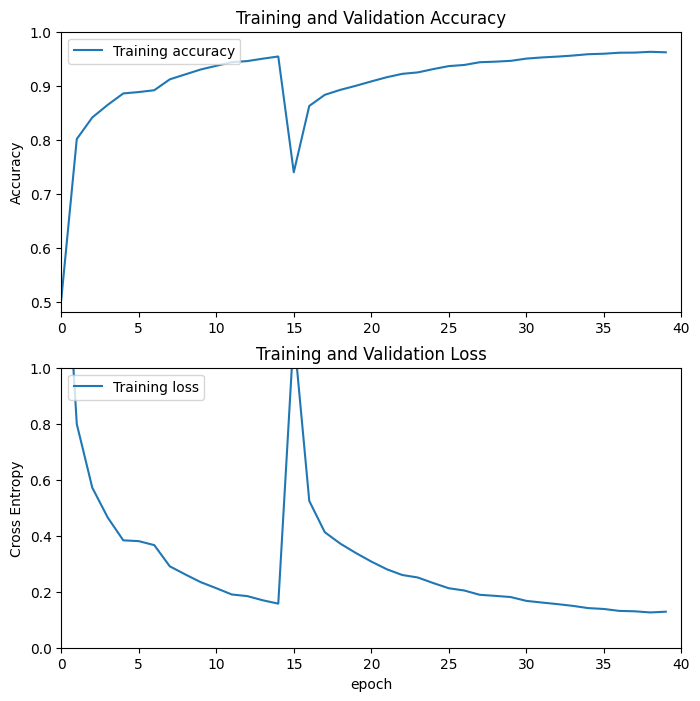

In [24]:
plot_stats(model_history)

In [25]:
os.listdir()

['.config', 'history.json', 'unet_model.keras', 'drive', 'sample_data']

In [26]:
import shutil
shutil.move("unet_model.keras", "drive/MyDrive/carla1_dataset/")

Error: Destination path 'drive/MyDrive/carla1_dataset/unet_model.keras' already exists

In [ ]:
unet = tf.keras.models.load_model('drive/MyDrive/carla1_dataset/unet_model.keras')

In [27]:
def display(display_list):
    """
    Displays images
    """
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

In [28]:
def create_mask(predicted_mask):
  predicted_mask = tf.math.argmax(predicted_mask, axis=-1)
  predicted_mask = predicted_mask[..., tf.newaxis]
  return predicted_mask[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
(96, 128, 1)


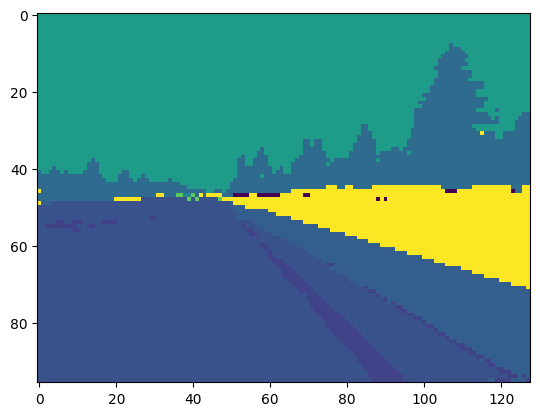

In [29]:
for image, mask in train_dataset.take(1):
  pred_mask = unet.predict(image)
  pred_mask = create_mask(pred_mask)
  print(pred_mask.shape)
  plt.imshow(pred_mask)

In [30]:
def show_predictions(dataset=None, num=1):
    """
    Displays the first image of each of the num batches
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = unet.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
             create_mask(unet.predict(sample_image[tf.newaxis, ...]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


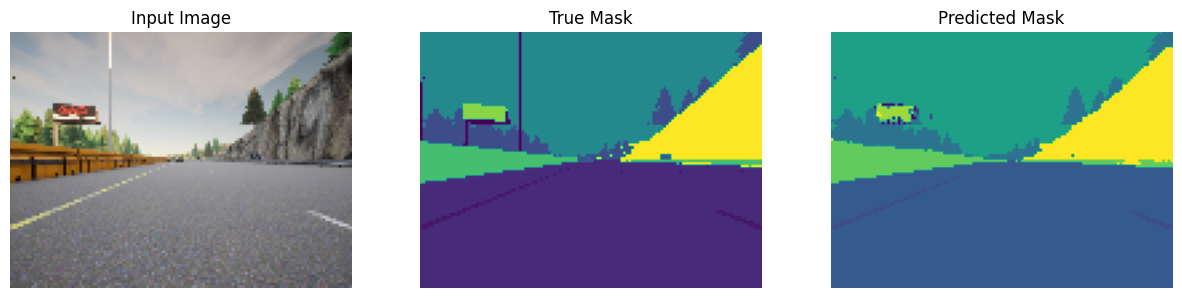

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


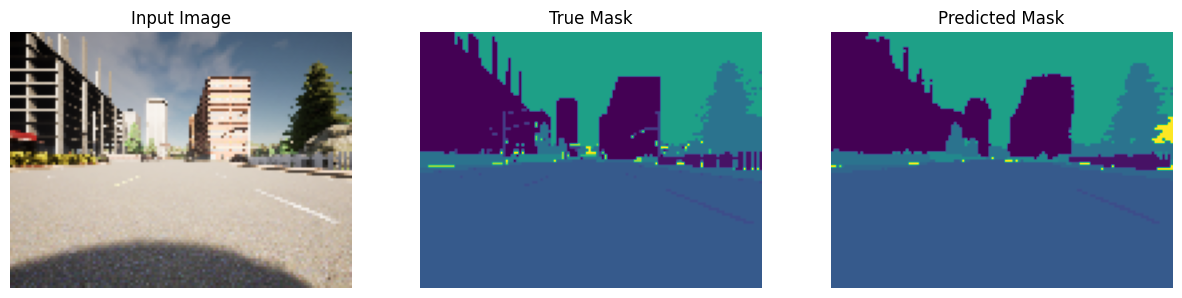

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


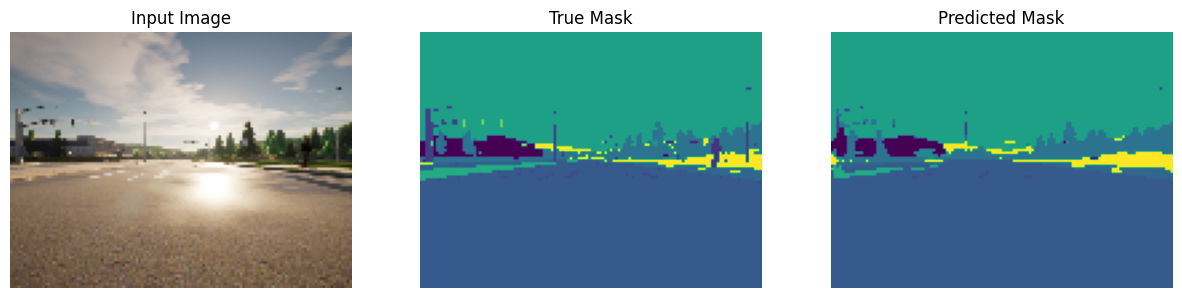

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


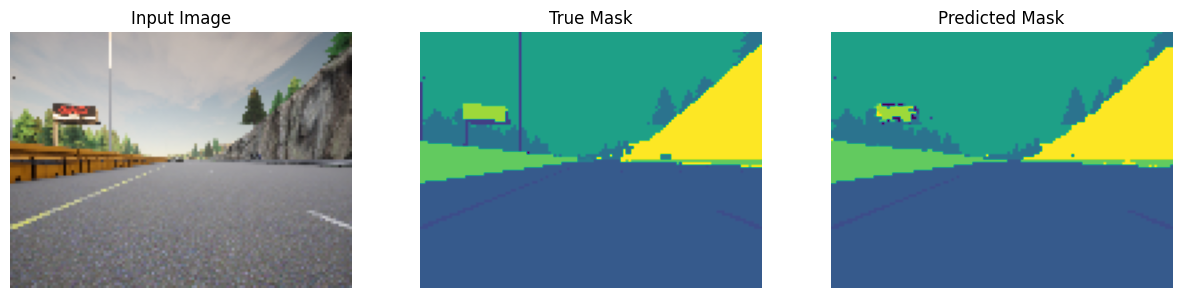

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


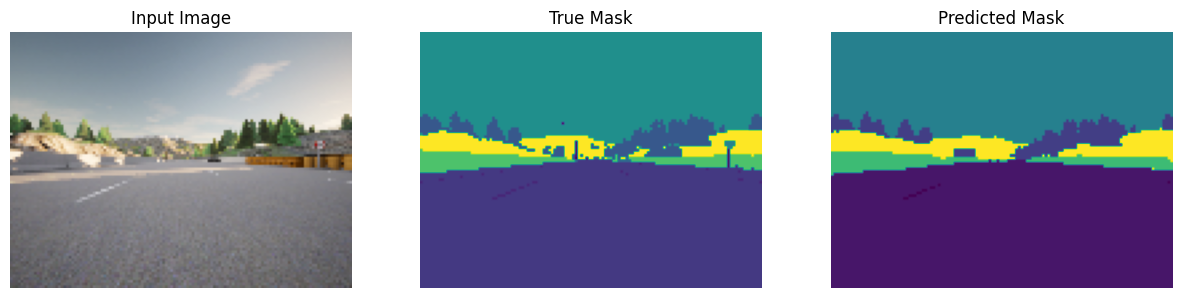

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


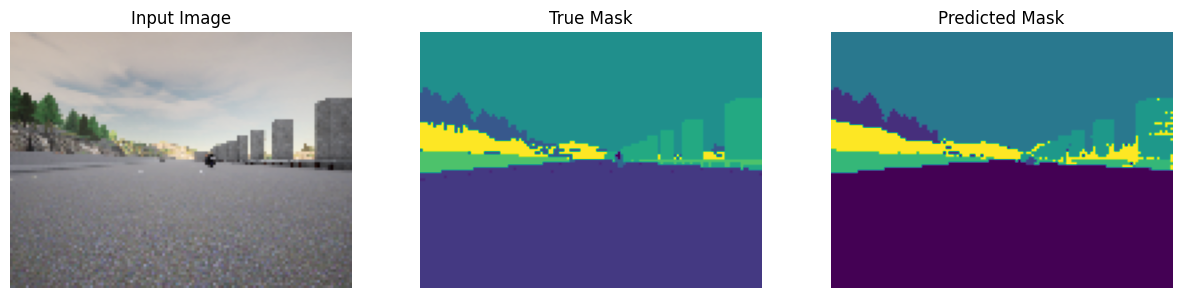

In [31]:
show_predictions(train_dataset, 6)